In [85]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import figure as fig
import mplfinance as mpf
import math


In [39]:
dataset=pd.read_csv('C:/Users/Sebi/Desktop/B.tech/GRIET/sem 6/mini proj/archive (1)/Data/DABUR.NS.csv')

In [40]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,8.610,8.675,8.535,8.585,3.851048,2331240
1,2002-07-02,8.575,8.615,8.525,8.585,3.851048,925272
2,2002-07-03,8.585,8.640,8.540,8.585,3.851048,1304064
3,2002-07-04,8.660,8.665,8.540,8.560,3.839834,1589202
4,2002-07-05,8.635,9.000,8.565,8.815,3.954221,3139716


In [21]:
dataset['Date']=pd.to_datetime(dataset.Date)

In [23]:
dataset.shape

(4420, 7)

In [42]:
dataset.drop(,axis = 1, inplace = True)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,8.610,8.675,8.535,8.585,3.851048,2331240
1,2002-07-02,8.575,8.615,8.525,8.585,3.851048,925272
2,2002-07-03,8.585,8.640,8.540,8.585,3.851048,1304064
3,2002-07-04,8.660,8.665,8.540,8.560,3.839834,1589202
4,2002-07-05,8.635,9.000,8.565,8.815,3.954221,3139716


In [28]:
dataset.isnull().sum()
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4420 entries, 0 to 4419
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4420 non-null   datetime64[ns]
 1   Open    4420 non-null   float64       
 2   High    4420 non-null   float64       
 3   Low     4420 non-null   float64       
 4   Close   4420 non-null   float64       
 5   Volume  4420 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 207.3 KB


In [32]:
dataset.describe()

,Open,High,Low,Close,Volume
count,4420.000000,4420.000000,4420.000000,4420.000000,4.420000e+03
mean,154.840085,156.894291,152.677793,154.703176,1.819940e+06
std,139.750804,141.425982,138.006825,139.646854,1.882126e+06
min,5.975000,6.135000,5.165000,5.940000,0.000000e+00
25%,45.000000,45.799999,43.952500,44.972499,7.873700e+05
50%,102.099998,103.875000,100.775002,102.275002,1.284784e+06
75%,272.662498,275.250000,268.750000,272.025002,2.219985e+06
max,520.000000,525.000000,514.549988,519.900024,3.602862e+07


In [34]:
print(len(dataset))

4420


            Date        Open        High         Low       Close   Adj Close  \
0     2002-07-01    8.610000    8.675000    8.535000    8.585000    3.851048   
1     2002-07-02    8.575000    8.615000    8.525000    8.585000    3.851048   
2     2002-07-03    8.585000    8.640000    8.540000    8.585000    3.851048   
3     2002-07-04    8.660000    8.665000    8.540000    8.560000    3.839834   
4     2002-07-05    8.635000    9.000000    8.565000    8.815000    3.954221   
...          ...         ...         ...         ...         ...         ...   
4415  2020-06-01  470.000000  473.950012  462.000000  469.250000  469.250000   
4416  2020-06-02  469.250000  476.899994  459.049988  460.850006  460.850006   
4417  2020-06-03  464.100006  470.600006  457.100006  463.350006  463.350006   
4418  2020-06-04  465.000000  469.450012  458.000000  462.549988  462.549988   
4419  2020-06-05  464.000000  466.500000  457.500000  462.850006  462.850006   

       Volume  
0     2331240  
1      

<AxesSubplot:>

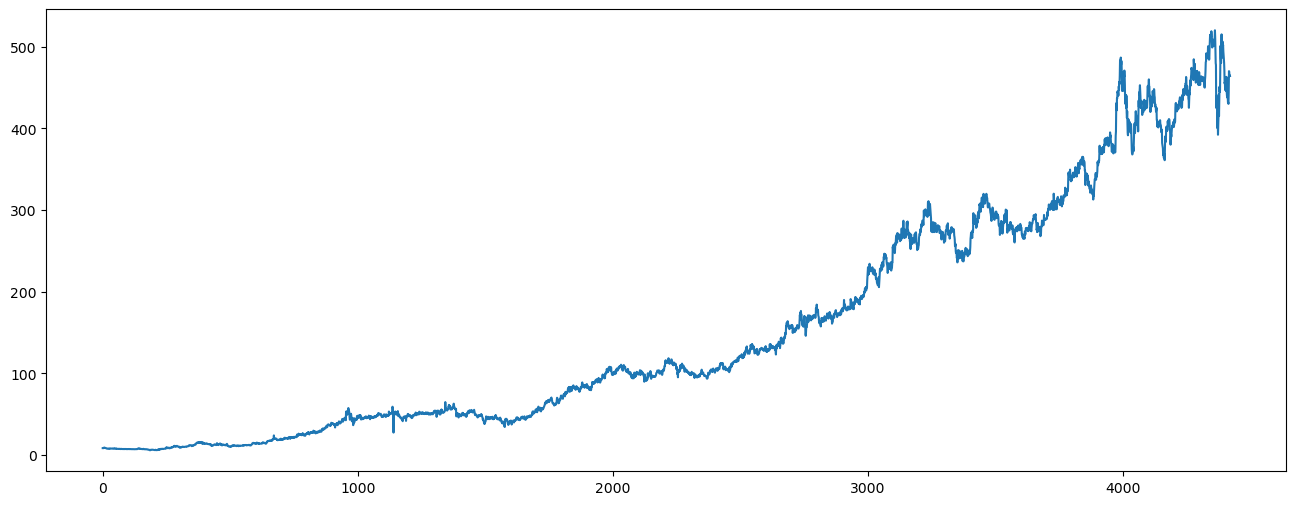

In [52]:
print(dataset)
#mpf.plot(dataset,type='candle',style='charles')
dataset['Open'].plot(figsize=(16,6))

In [55]:
x = dataset[['Open','High','Low','Volume']]
y= dataset['Close']
#print(x)

In [74]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test =train_test_split(x , y, random_state=0)
#x_train.shape
#x_test.shape
print(y_test)

3241    294.700012
2118     98.250000
1945     90.650002
666      19.285000
1775     61.450001
           ...    
3905    357.100006
3231    293.299988
443      12.285000
2600    128.949997
3538    293.149994
Name: Close, Length: 1105, dtype: float64


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [67]:
print(regressor.coef_)

[-5.22226586e-01  7.74687308e-01  7.46661076e-01 -1.11166206e-08]


In [69]:
print(regressor.intercept_)

0.02110592930065991


In [71]:
predicted=regressor.predict(x_test)
print(x_test)

            Open        High         Low   Volume
3241  293.799988  297.899994  291.000000   380032
2118   99.199997  100.250000   97.900002  1999212
1945   93.500000   94.425003   90.275002   213622
666    19.600000   19.600000   18.865000  1714182
1775   63.000000   63.000000   60.775002   912884
...          ...         ...         ...      ...
3905  361.000000  364.000000  355.000000  1573999
3231  292.850006  295.450012  289.600006   988467
443    12.415000   12.600000   12.165000   880836
2600  133.000000  133.000000  127.050003   846500
3538  295.000000  298.500000  290.700012  2018310

[1105 rows x 4 columns]


In [77]:
dframe=pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'actual_price':y_test,'predicted_price':predicted})
print(dfr)

      actual_price  predicted_price
3241    294.700012       294.644434
2118     98.250000        98.954529
1945     90.650002        91.745227
666      19.285000        19.036041
1775     61.450001        61.294311
...            ...              ...
3905    357.100006       358.530673
3231    293.299988       292.190485
443      12.285000        12.372063
2600    128.949997       128.452264
3538    293.149994       294.240372

[1105 rows x 2 columns]


In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score
regressor.score(x_test,y_test)

0.9998925954851277

In [81]:
print('mean absolute error',metrics.mean_absolute_error(y_test,predicted))

mean absolute error 0.800046737245915


In [83]:
print('mean squared error',metrics.mean_squared_error(y_test,predicted))

mean squared error 2.094322866736483


In [87]:
print('root mean squared error',math.sqrt(metrics.mean_absolute_error(y_test,predicted)))

root mean squared error 0.89445331753307


<AxesSubplot:>

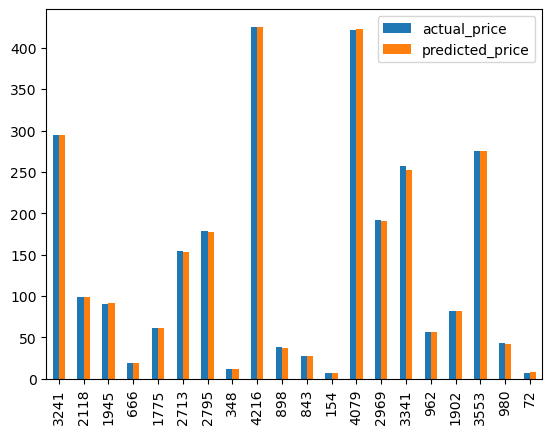

In [88]:
graph=dfr.head(20)
graph.plot(kind='bar')